<a href="https://colab.research.google.com/github/JaswanthReddy15/Jaswanth_Reddy_INBT03921_AUG_2023/blob/main/CIFAR10_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import datasets

In [2]:
import tensorflow as tf
from keras.datasets import cifar10
from matplotlib import pyplot
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image#loading dataset
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()
#spliting of dataset
xtrain,xtest,ytrain,ytest=train_test_split(x_train,y_train,test_size=0.2)
print("train data: ",xtrain.shape)
print("test data: ",xtest.shape)

170498071/170498071 [==============================] - 14s 0us/step
train data:  (40000, 32, 32, 3)
test data:  (10000, 32, 32, 3)


In [3]:
import numpy as np
from tensorflow.keras.utils import to_categorical
import keras
from keras.models import Sequential
from tensorflow.keras import datasets,layers,models
from keras import regularizers
from keras.layers import Dense,Dropout,BatchNormalization
print(np.unique(ytrain))
print(np.unique(ytest))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [4]:
num_classes = len(np.unique(ytrain))
Y_train_encoded = to_categorical(y_train, num_classes)
Y_test_encoded = to_categorical(y_test, num_classes)
#normalize pixel values
xtrain,xtest=xtrain/255.0, xtest/255.0

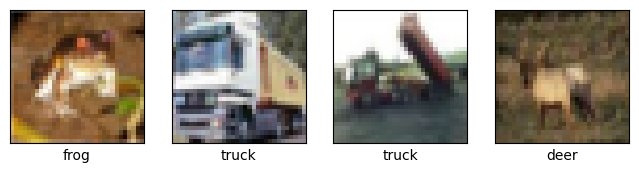

In [16]:
#verifying data
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(8,8))
for i in range(4):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(classes[y_train[i][0]])
plt.show()

In [6]:
#VGG19 model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input

base_model = VGG19(include_top=False,weights='imagenet',input_shape=(32,32,3),classes=y_train.shape[1])

80134624/80134624 [==============================] - 5s 0us/step


In [7]:
#CNN model
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.MaxPooling2D((2,2)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [9]:
#compiling and trainig the model
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 22s 7ms/step - loss: 1.5659 - accuracy: 0.4859 - val_loss: 1.1778 - val_accuracy: 0.5820
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1103 - accuracy: 0.6095 - val_loss: 1.1003 - val_accuracy: 0.6196
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9966 - accuracy: 0.6512 - val_loss: 1.0602 - val_accuracy: 0.6295
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9040 - accuracy: 0.6874 - val_loss: 1.0543 - val_accuracy: 0.6446
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8372 - accuracy: 0.7083 - val_loss: 0.9867 - val_accuracy: 0.6641
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7546 - accuracy: 0.7363 - val_loss: 0.9878 - val_accuracy: 0.6652
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6865 - accuracy: 0.7608 - val_loss: 1.0439 - val_accur

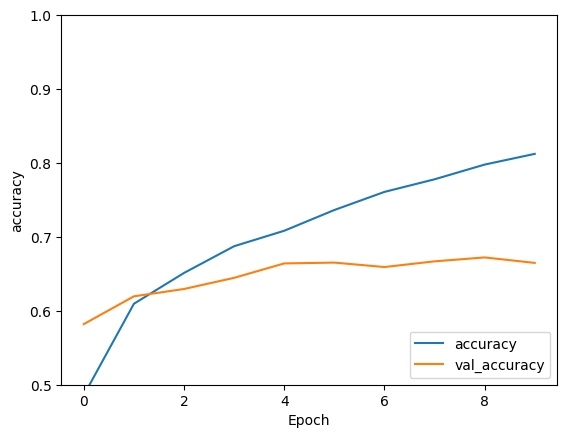

In [10]:
#evaluating the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')
losses,acc=model.evaluate(x_test,y_test,verbose=3)

In [11]:
print('accuracy: {:.2f}%'.format(acc*100))

accuracy: 66.48%


In [12]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
prediction=model.predict(x_test)
true_value=np.argmax(prediction,axis=1)
conf_matrix = confusion_matrix(y_test, true_value)
print(conf_matrix)
print("accuracy:",accuracy_score(y_test,true_value)*100)
print("report:",classification_report(y_test,true_value))

313/313 [==============================] - 1s 2ms/step
[[628  31  78  35  32   4   7  15 117  53]
 [ 25 795   4  10   2   4   9   1  43 107]
 [ 61  11 518  88  96  71  51  45  44  15]
 [ 16  19  72 476  80 179  51  38  36  33]
 [ 23   7  57  69 631  38  49  84  29  13]
 [  4  10  47 205  60 549  21  65  18  21]
 [  7   5  46  75  65  23 733  22  14  10]
 [ 11   7  36  50  66  65   5 705  11  44]
 [ 48  44  18  19   5   7   4   2 802  51]
 [ 16  73   6  13   7   3   5  14  52 811]]
accuracy: 66.47999999999999
report:               precision    recall  f1-score   support

           0       0.75      0.63      0.68      1000
           1       0.79      0.80      0.79      1000
           2       0.59      0.52      0.55      1000
           3       0.46      0.48      0.47      1000
           4       0.60      0.63      0.62      1000
           5       0.58      0.55      0.57      1000
           6       0.78      0.73      0.76      1000
           7       0.71      0.70      0.71  

In [13]:
#confusion matirx
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, weight='bold', fontsize=14)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=14)
    plt.yticks(tick_marks, classes, fontsize=14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center', fontsize=12, weight='bold',
                 color='white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

In [14]:
def plot_normalized_confusion_matrix(cm, classes, title='Normalized Confusion Matrix', cmap=plt.cm.Blues):
    plot_confusion_matrix(cm, classes, normalize=True, title=title, cmap=cmap)
def plot_unnormalized_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plot_confusion_matrix(cm, classes, normalize=False, title=title, cmap=cmap)

Normalized Confusion Matrix


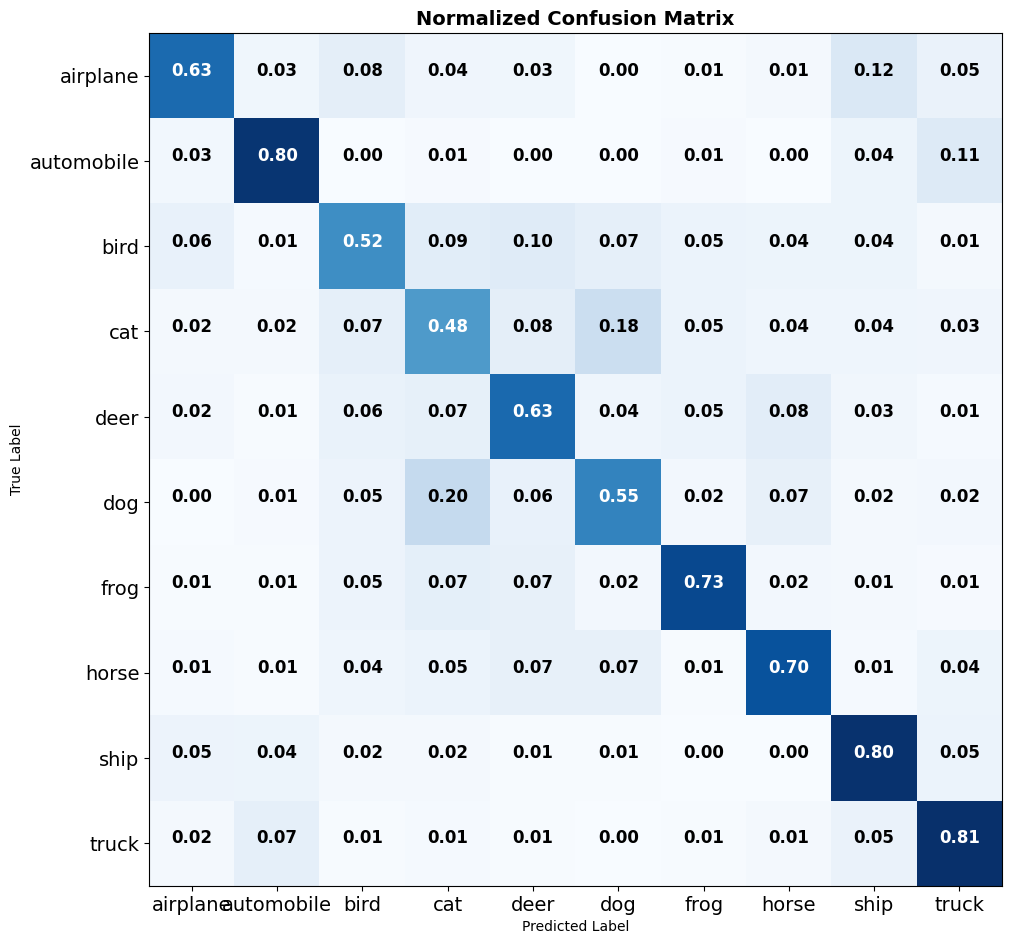

without normalization


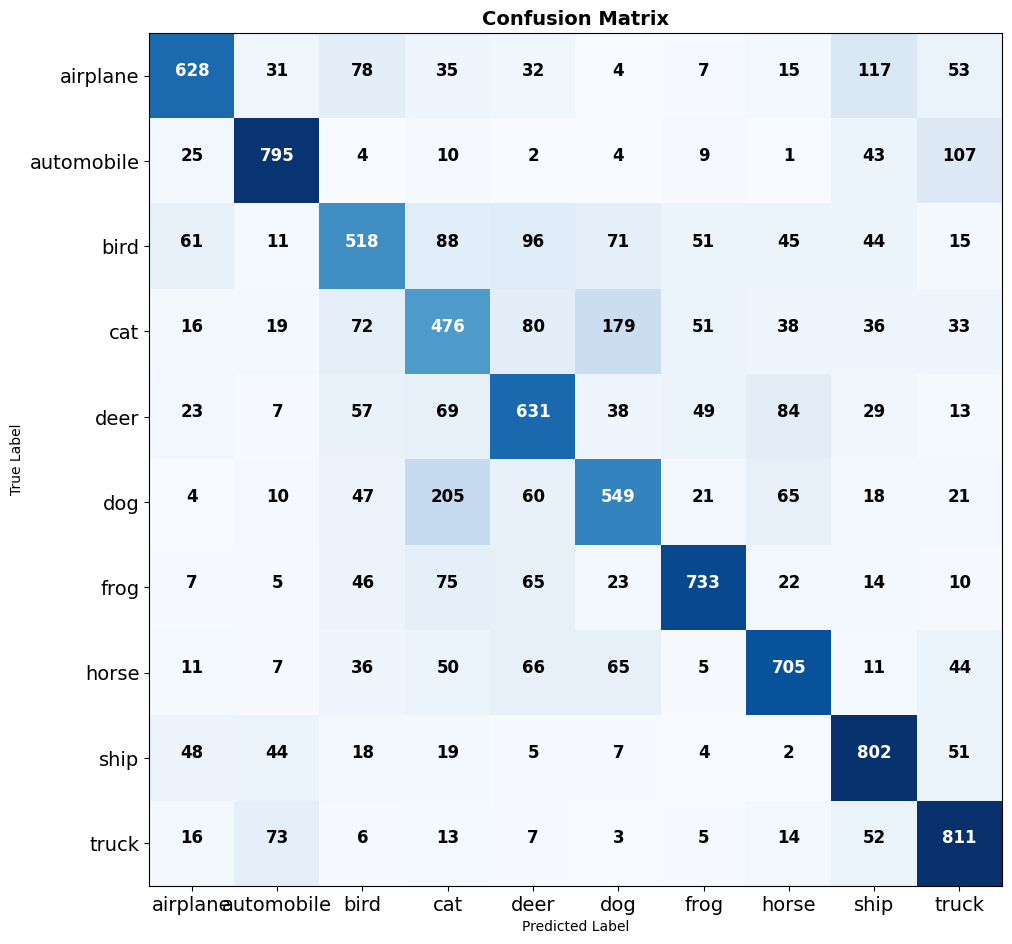

In [15]:
#plotting the graphes
plt.figure(figsize=(10, 10))
plot_normalized_confusion_matrix(conf_matrix, classes=classes, title='Normalized Confusion Matrix')
plt.show()

plt.figure(figsize=(10, 10))
plot_unnormalized_confusion_matrix(conf_matrix, classes=classes, title='Confusion Matrix')
plt.show()